Ken Furudate

In [ ]:
import scanpy as sc
import anndata as ad
import squidpy as sq

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
import matplotlib.font_manager
plt.rcParams['font.sans-serif'] = ['Arial'] + plt.rcParams['font.sans-serif']
plt.rcParams["font.size"] = 20

import os
import seaborn as sns
from pathlib import Path
import pickle

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.10) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.21.6 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.10.2 python-igraph==0.9.8 pynndescent==0.5.5
squidpy==1.1.2


In [ ]:
datadir = "/data/spatial/"
in_f = "integrated_data.h5ad"

data = sc.read_h5ad(datadir + in_f)

In [ ]:
set(data.obs['sample'])

{'A', 'B', 'C', 'D'}

In [ ]:
data.obs

in_tissue  array_row  array_col  \
AAACAGCTTTCAGAAG-1-0-0-0-0-0-0-0          1         43          9   
AAACAGGGTCTATATT-1-0-0-0-0-0-0-0          1         47         13   
AAACCGGGTAGGTACC-1-0-0-0-0-0-0-0          1         42         28   
AAACCTCATGAAGTTG-1-0-0-0-0-0-0-0          1         37         19   
AAACTTGCAAACGTAT-1-0-0-0-0-0-0-0          1         45         19   
...                                     ...        ...        ...   
TTGTATCACACAGAAT-1-1-1                    1         12         74   
TTGTCGTTCAGTTACC-1-1-1                    1         22         58   
TTGTGAGGCATGACGC-1-1-1                    1         43         13   
TTGTGGCCCTGACAGT-1-1-1                    1         18         60   
TTGTTAGCAAATTCGA-1-1-1                    1         22         42   

                                     imagecol     imagerow         pathology  \
AAACAGCTTTCAGAAG-1-0-0-0-0-0-0-0   889.867818  1496.180699             CA_PD   
AAACAGGGTCTATATT-1-0-0-0-0-0-0-0   815.422523  1453.501963             CA_PD   
AAACCGGGTAGGTACC-1-0-0-0-0-0-0-0   908.135611  1292.971716  CA_PD_&_fibrosis   
AAACCTCATGAAGTTG-1-0-0-0-0-0-0-0  1001.333685  1388.998873  CA_PD_&_fibrosis   
AAACTTGCAAACGTAT-1-0-0-0-0-0-0-0   852.523924  1389.322197  CA_PD_&_fibrosis   
...                                       ...          ...               ...   
TTGTATCACACAGAAT-1-1-1            1519.067055   839.583949            muscle   
TTGTCGTTCAGTTACC-1-1-1            1337.377811  1007.248611            muscle   
TTGTGAGGCATGACGC-1-1-1             956.192831  1478.726685            muscle   
TTGTGGCCCTGACAGT-1-1-1            1410.179572   986.132949    adipose_tissue   
TTGTTAGCAAATTCGA-1-1-1            1337.850549  1174.598115            muscle   

                                   category    cluster sample  n_counts batch  \
AAACAGCTTTCAGAAG-1-0-0-0-0-0-0-0      tumor  cluster_6      A   46861.0     0   
AAACAGGGTCTATATT-1-0-0-0-0-0-0-0      tumor  cluster_6      A   53248.0     0   
AAACCGGGTAGGTACC-1-0-0-0-0-0-0-0      tumor  cluster_6      A   49741.0     0   
AAACCTCATGAAGTTG-1-0-0-0-0-0-0-0      tumor  cluster_5      A   39816.0     0   
AAACTTGCAAACGTAT-1-0-0-0-0-0-0-0      tumor  cluster_6      A   39005.0     0   
...                                     ...        ...    ...       ...   ...   
TTGTATCACACAGAAT-1-1-1            non_tumor  cluster_2      D   15987.0     1   
TTGTCGTTCAGTTACC-1-1-1            non_tumor  cluster_2      D    9873.0     1   
TTGTGAGGCATGACGC-1-1-1            non_tumor  cluster_1      D    5802.0     1   
TTGTGGCCCTGACAGT-1-1-1            non_tumor  cluster_4      D    7268.0     1   
TTGTTAGCAAATTCGA-1-1-1            non_tumor  cluster_2      D    6966.0     1   

                                  _scvi_batch  _scvi_labels leiden  \
AAACAGCTTTCAGAAG-1-0-0-0-0-0-0-0          0.0           0.0      2   
AAACAGGGTCTATATT-1-0-0-0-0-0-0-0          0.0           0.0      2   
AAACCGGGTAGGTACC-1-0-0-0-0-0-0-0          0.0           0.0      2   
AAACCTCATGAAGTTG-1-0-0-0-0-0-0-0          0.0           0.0      2   
AAACTTGCAAACGTAT-1-0-0-0-0-0-0-0          0.0           0.0      2   
...                                       ...           ...    ...   
TTGTATCACACAGAAT-1-1-1                    NaN           NaN    NaN   
TTGTCGTTCAGTTACC-1-1-1                    NaN           NaN    NaN   
TTGTGAGGCATGACGC-1-1-1                    NaN           NaN    NaN   
TTGTGGCCCTGACAGT-1-1-1                    NaN           NaN    NaN   
TTGTTAGCAAATTCGA-1-1-1                    NaN           NaN    NaN   

                                  sample_density  _scvi_raw_norm_scaling  \
AAACAGCTTTCAGAAG-1-0-0-0-0-0-0-0        0.299178                0.488448   
AAACAGGGTCTATATT-1-0-0-0-0-0-0-0        0.394160                0.427991   
AAACCGGGTAGGTACC-1-0-0-0-0-0-0-0        0.388597                0.478057   
AAACCTCATGAAGTTG-1-0-0-0-0-0-0-0        0.380648                0.550964   
AAACTTGCAAACGTAT-1-0-0-0-0-0-0-0        0.447035  

In [ ]:
adata = data[data.obs['sample']=="A"]
bdata = data[data.obs['sample']=="B"]
cdata = data[data.obs['sample']=="C"]
ddata = data[data.obs['sample']=="D"]

In [ ]:
adata = adata[adata.obs['category']=="tumor"]
bdata = bdata[bdata.obs['category']=="tumor"]
cdata = cdata[cdata.obs['category']=="tumor"]
ddata = ddata[ddata.obs['category']=="tumor"]


In [ ]:
adata.uns["spatial"] = pickle_load(datadir + 'adata_uns_spatial.pickle') 
bdata.uns["spatial"] = pickle_load(datadir + 'bdata_uns_spatial.pickle') 
cdata.uns["spatial"] = pickle_load(datadir + 'cdata_uns_spatial.pickle') 
ddata.uns["spatial"] = pickle_load(datadir + 'ddata_uns_spatial.pickle') 

Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


In [ ]:
sample_lst = ["A", "B", "C", "D"]

In [ ]:
def set_param(input_data, sample):
  scale = input_data.uns['spatial'][f"{sample}"]['scalefactors']['tissue_hires_scalef']
  img = sq.im.ImageContainer(input_data.uns['spatial'][f"{sample}"]['images']['hires'],
                           scale=scale, 
                           library_id=f"{sample}")
  img.show()
  return scale, img

Adding image layer `image`
Adding image layer `image`
Adding image layer `image`
Adding image layer `image`


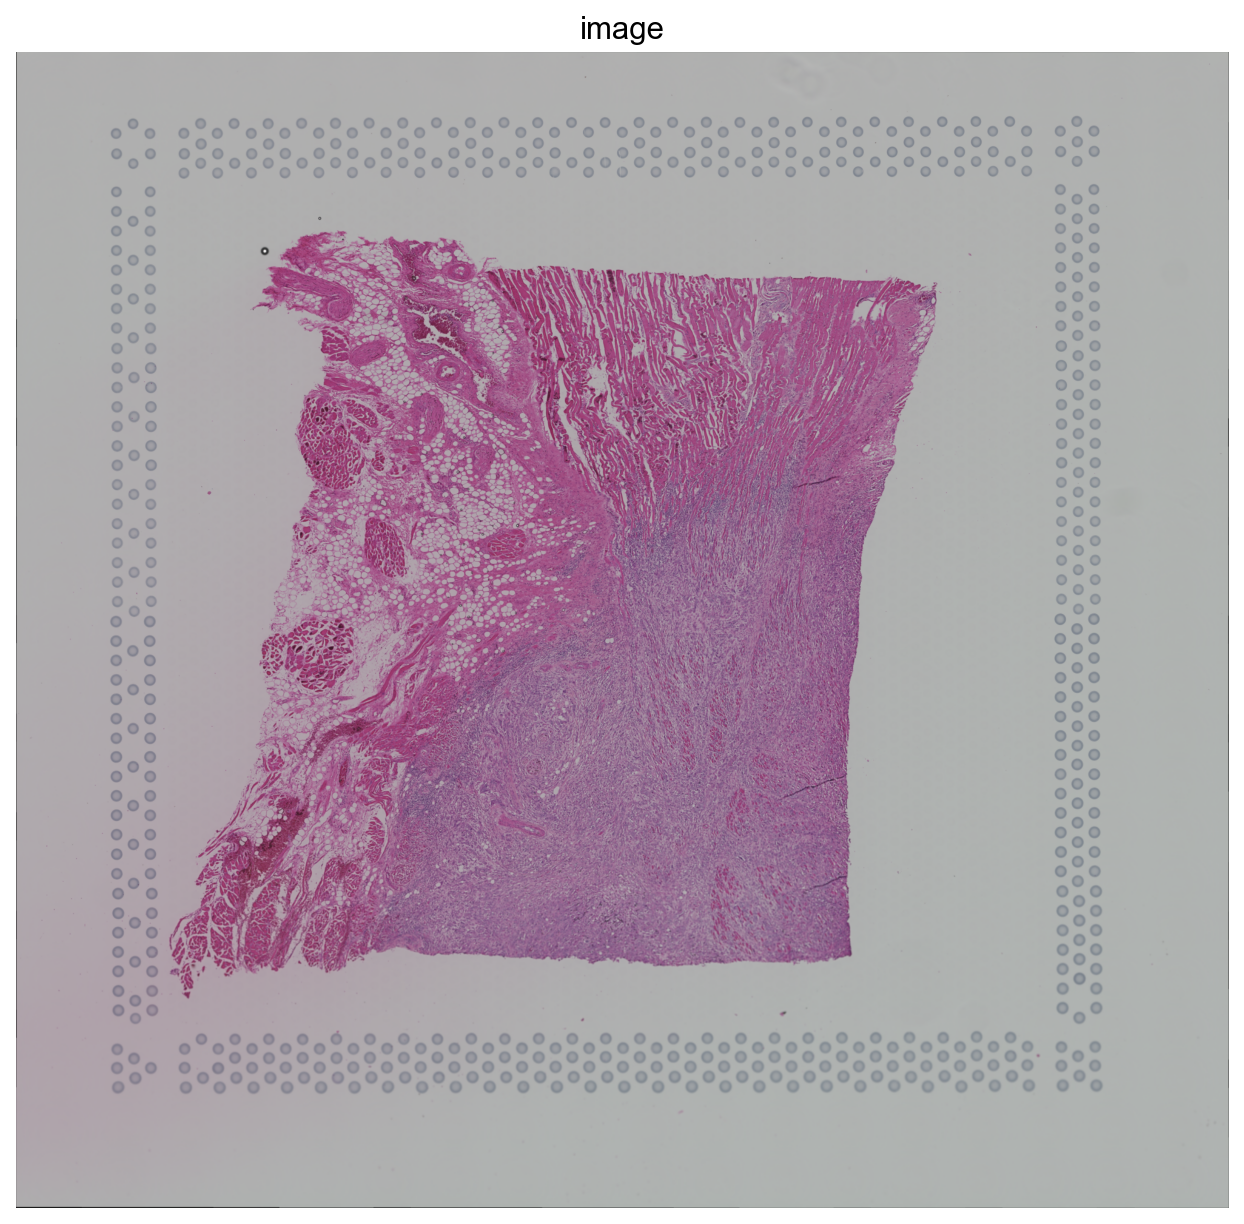

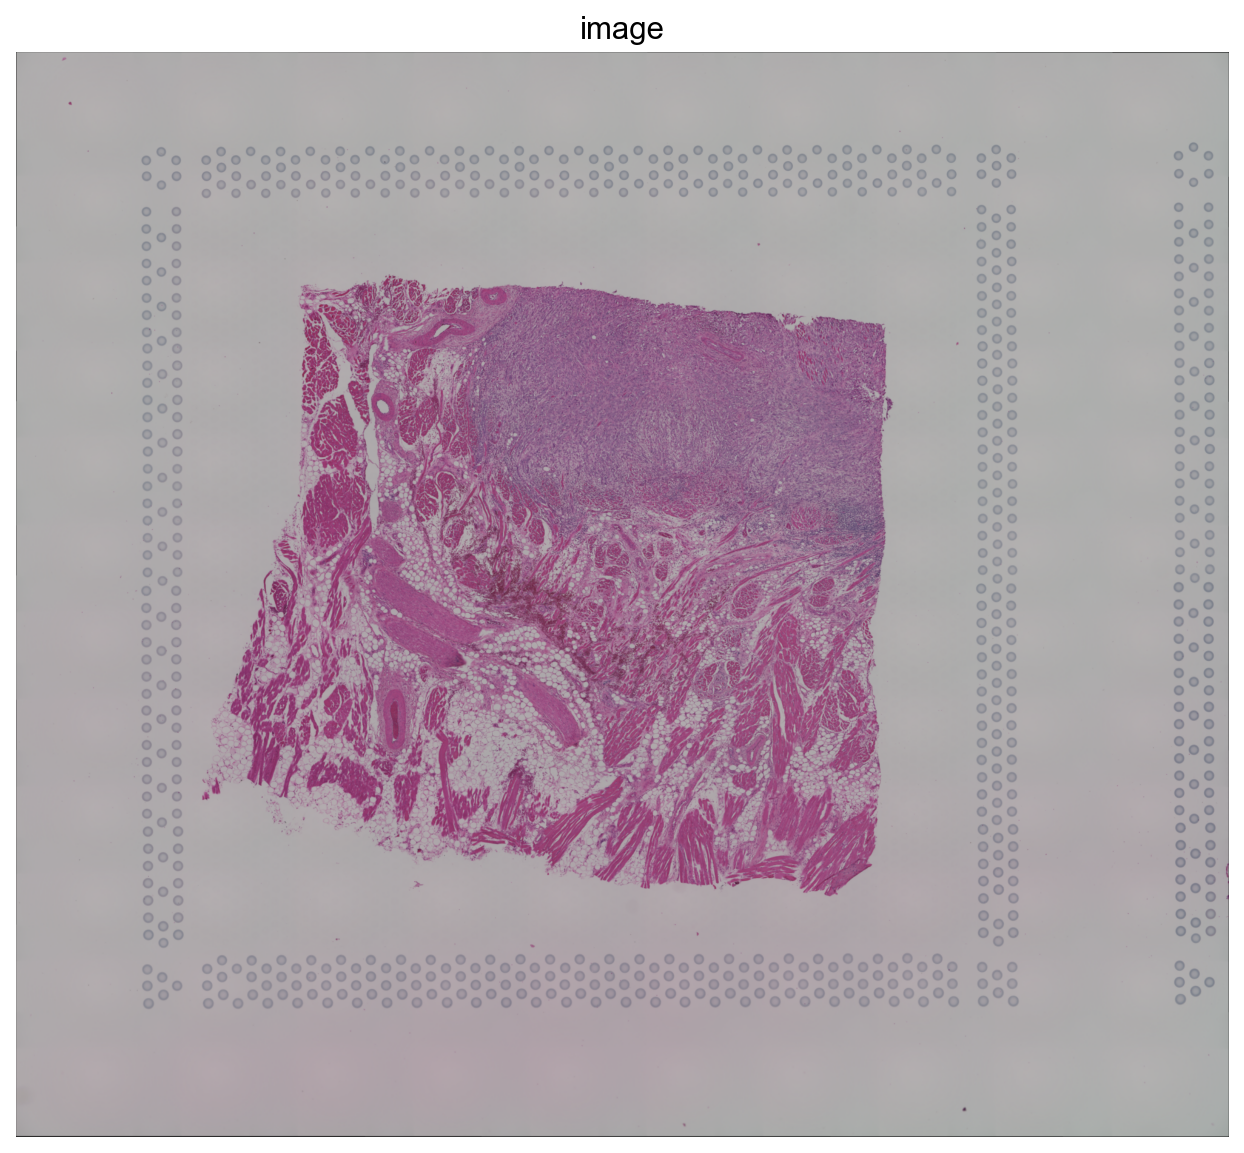

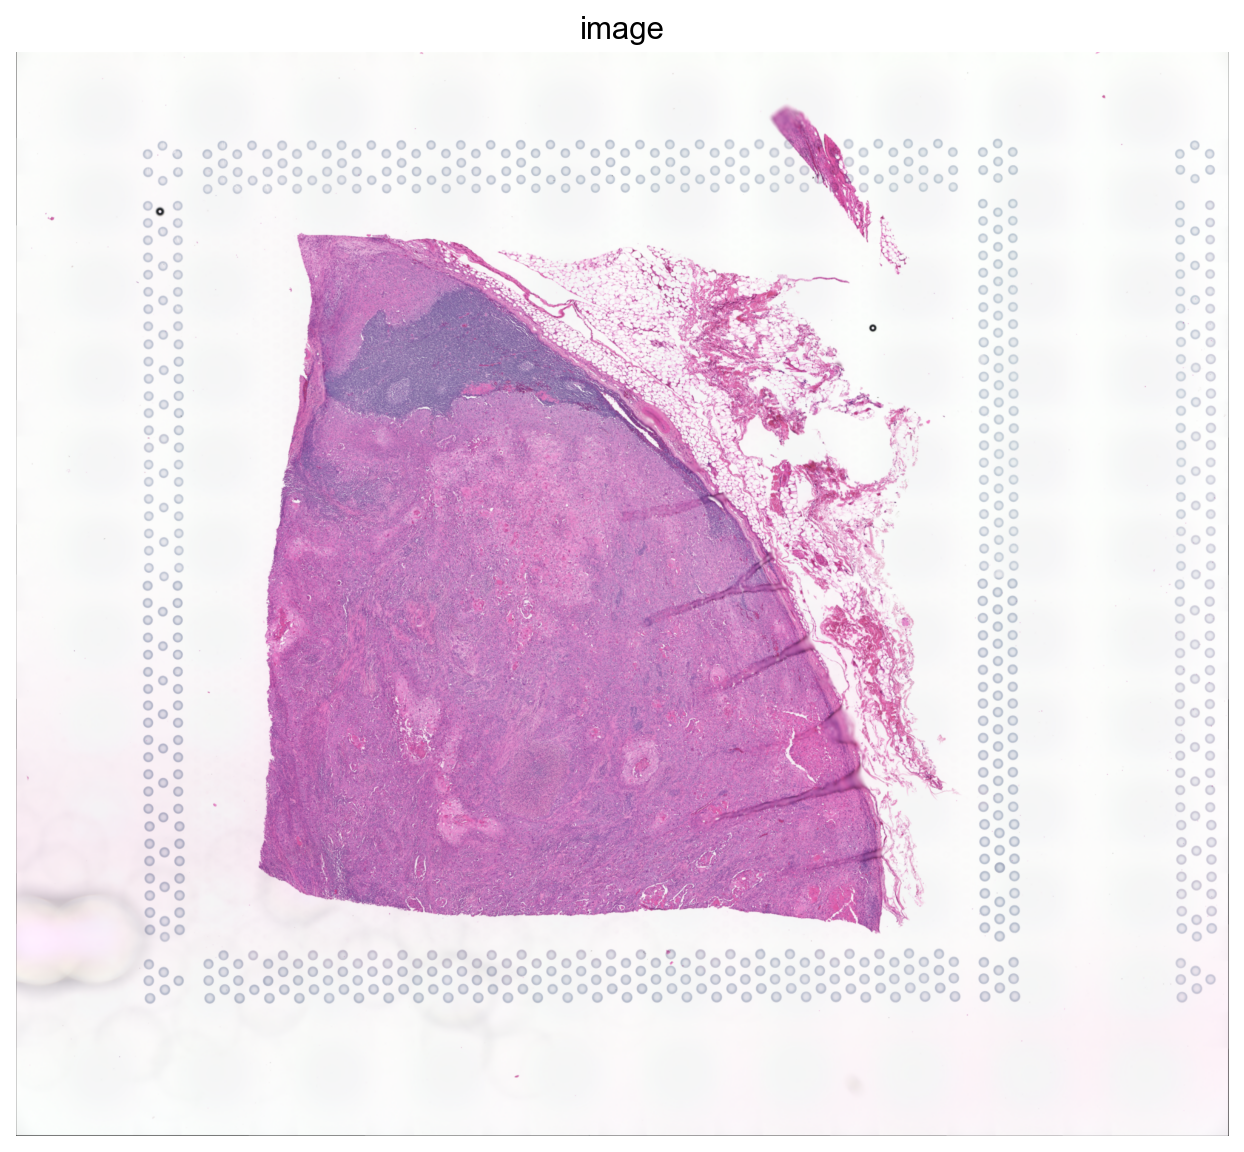

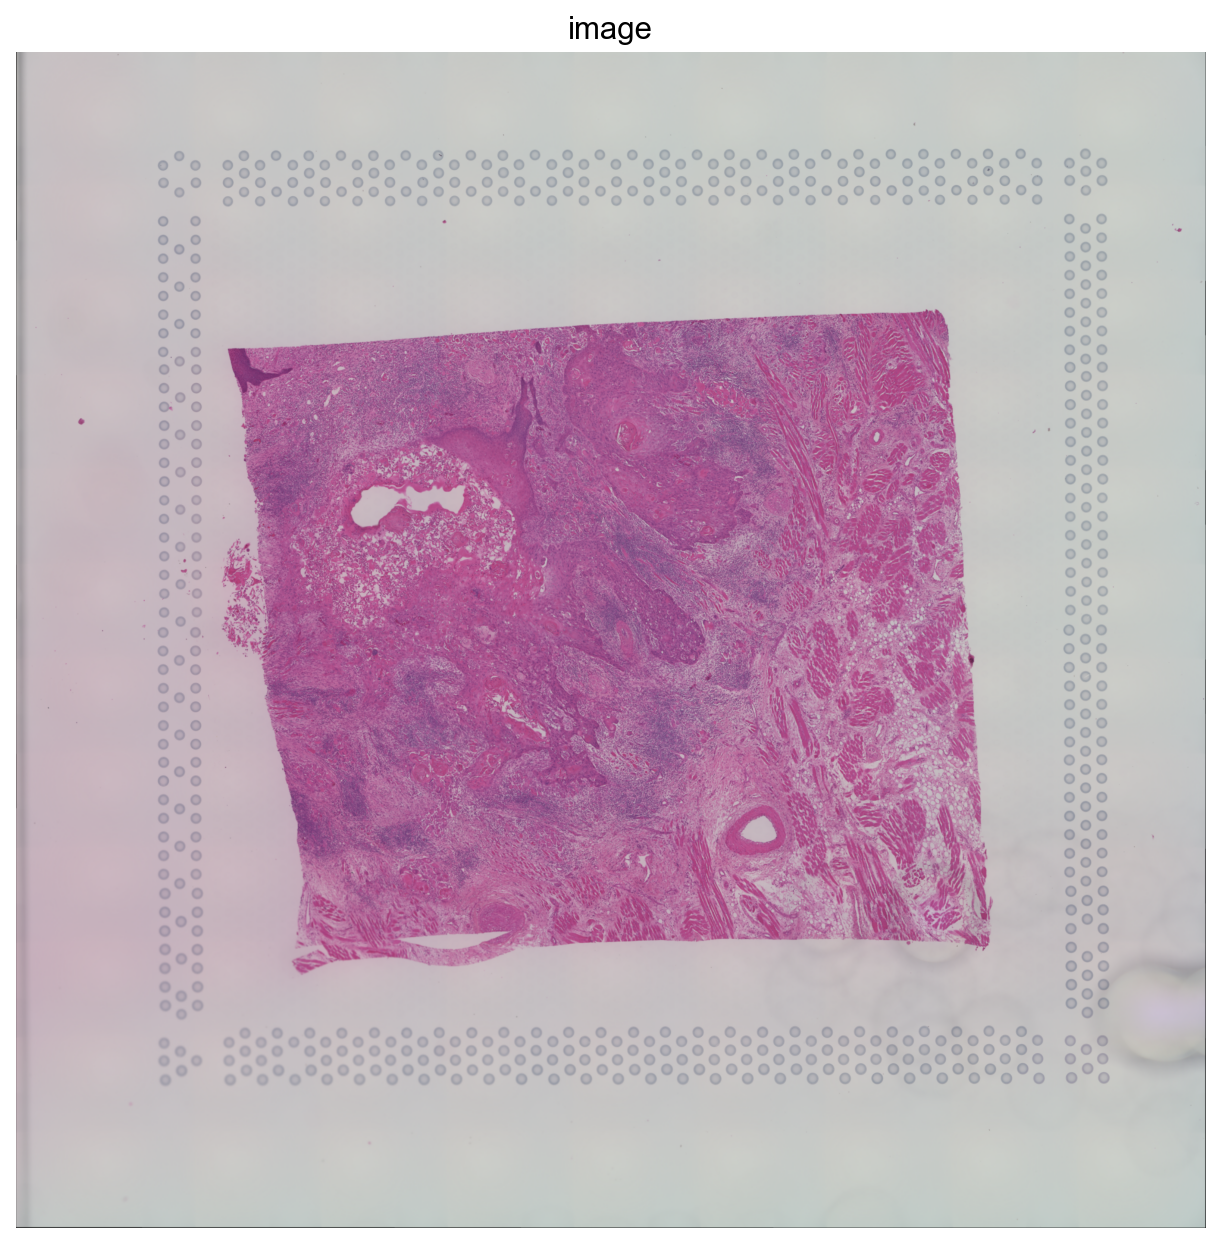

In [ ]:
scale_a, img_a = set_param(adata, "A2")
scale_b, img_b = set_param(bdata, "B2")
scale_c, img_c = set_param(cdata, "C2")
scale_d, img_d = set_param(ddata, "D2")

In [ ]:
select_col="category"

In [ ]:
select_g = sorted(list(set(adata.obs[select_col])))
select_g 

['non_tumor', 'peritumor', 'tumor']

In [ ]:
res = sq.gr.ligrec(
    adata,
    n_perms=1000,
    threshold=0.01,
    cluster_key=select_col,
    copy=True,
    use_raw=False,
    transmitter_params={"categories": "ligand"},
    receiver_params={"categories": "receptor"},
    interactions_params={'resources': 'CellPhoneDB'},
    corr_method="fdr_bh",
    corr_axis="clusters",
    alpha=0.05,
    seed=42,
    n_jobs=4
)

Fetching interactions from `omnipath`


0.00B [00:00, ?B/s]

0.00B [00:00, ?B/s]

0.00B [00:00, ?B/s]

Fetched `1131` interactions
    Finish (0:00:00)
Running `1000` permutations on `507` interactions and `9` cluster combinations using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?permutation/s]

Performing FDR correction across the `clusters` using method `fdr_bh` at level `0.05`
Finish (0:00:03)


In [ ]:
res["means"]

cluster_1       non_tumor                     peritumor                      \
cluster_2       non_tumor peritumor     tumor non_tumor peritumor     tumor   
source target                                                                 
JAG2   NOTCH1    0.037185  0.050290  0.132506  0.117971  0.131077  0.213293   
DLL1   NOTCH1    0.019014  0.032120  0.114336  0.043563  0.056669  0.138885   
JAG1   NOTCH1    0.041777  0.054882  0.137098  0.208882  0.221988  0.304204   
TNF    NOTCH1    0.007435  0.020541  0.102757  0.022467  0.035573  0.117789   
DLL4   NOTCH1    0.015992  0.029098  0.111314  0.025266  0.038372  0.120588   
...                   ...       ...       ...       ...       ...       ...   
CD52   SIGLEC10  0.005599  0.014969  0.087363  0.022814  0.032185  0.104579   
IL18   IL18R1    0.004002  0.015125  0.030664  0.010737  0.021859  0.037398   
TSLP   TSLP      0.001743  0.004485  0.015152  0.004485  0.007228  0.017895   
IFNG   IFNG      0.000614  0.003137  0.022718  0.003137  0.005661  0.025241   
COPA   P2RY6     0.036267  0.045983  0.102777  0.149610  0.159327  0.216120   

cluster_1           tumor                      
cluster_2       non_tumor peritumor     tumor  
source target                                  
JAG2   NOTCH1    0.661232  0.674338  0.756554  
DLL1   NOTCH1    0.357037  0.370142  0.452358  
JAG1   NOTCH1    0.828354  0.841460  0.923676  
TNF    NOTCH1    0.142628  0.155733  0.237949  
DLL4   NOTCH1    0.090416  0.103521  0.185737  
...                   ...       ...       ...  
CD52   SIGLEC10  0.073061  0.082432  0.154825  
IL18   IL18R1    0.035096  0.046219  0.061758  
TSLP   TSLP      0.015152  0.017895  0.028562  
IFNG   IFNG      0.022718  0.025241  0.044822  
COPA   P2RY6     0.634216  0.643933  0.700726  

[507 rows x 9 columns]

In [ ]:
res_means_T = res["means"].T
order_ =  ["tumor", "peritumor", "non_tumor"]
new_idx = pd.MultiIndex.from_product([order_ ,
                                      order_ ], 
                                     names=res_means_T.index.names
                                     )
                                    

In [ ]:
res_df = pd.concat([res_means_T.reindex(new_idx).T,
                    res["pvalues"].T.reindex(new_idx).T.add_suffix("_pval")],
                   axis=1)
res_df

cluster_1           tumor                     peritumor                      \
cluster_2           tumor peritumor non_tumor     tumor peritumor non_tumor   
source target                                                                 
JAG2   NOTCH1    0.756554  0.674338  0.661232  0.213293  0.131077  0.117971   
DLL1   NOTCH1    0.452358  0.370142  0.357037  0.138885  0.056669  0.043563   
JAG1   NOTCH1    0.923676  0.841460  0.828354  0.304204  0.221988  0.208882   
TNF    NOTCH1    0.237949  0.155733  0.142628  0.117789  0.035573  0.022467   
DLL4   NOTCH1    0.185737  0.103521  0.090416  0.120588  0.038372  0.025266   
...                   ...       ...       ...       ...       ...       ...   
CD52   SIGLEC10  0.154825  0.082432  0.073061  0.104579  0.032185  0.022814   
IL18   IL18R1    0.061758  0.046219  0.035096  0.037398  0.021859  0.010737   
TSLP   TSLP      0.028562  0.017895  0.015152  0.017895  0.007228  0.004485   
IFNG   IFNG      0.044822  0.025241  0.022718  0.025241  0.005661  0.003137   
COPA   P2RY6     0.700726  0.643933  0.634216  0.216120  0.159327  0.149610   

cluster_1       non_tumor                     tumor_pval                 \
cluster_2           tumor peritumor non_tumor tumor_pval peritumor_pval   
source target                                                             
JAG2   NOTCH1    0.132506  0.050290  0.037185        0.0       0.000000   
DLL1   NOTCH1    0.114336  0.032120  0.019014        0.0       0.000000   
JAG1   NOTCH1    0.137098  0.054882  0.041777        0.0       0.000000   
TNF    NOTCH1    0.102757  0.020541  0.007435        0.0       0.000000   
DLL4   NOTCH1    0.111314  0.029098  0.015992        0.0       0.001696   
...                   ...       ...       ...        ...            ...   
CD52   SIGLEC10  0.087363  0.014969  0.005599        0.0       0.006606   
IL18   IL18R1    0.030664  0.015125  0.004002        0.0       0.000000   
TSLP   TSLP      0.015152  0.004485  0.001743        0.0       0.014486   
IFNG   IFNG      0.022718  0.003137  0.000614        0.0       0.022043   
COPA   P2RY6     0.102777  0.045983  0.036267        0.0       0.000000   

cluster_1                      peritumor_pval                                \
cluster_2       non_tumor_pval     tumor_pval peritumor_pval non_tumor_pval   
source target                                                                 
JAG2   NOTCH1         0.000000       1.000000            1.0            1.0   
DLL1   NOTCH1         0.000000       1.000000            1.0            1.0   
JAG1   NOTCH1         0.000000       1.000000            1.0            1.0   
TNF    NOTCH1         0.000000       0.009864            1.0            1.0   
DLL4   NOTCH1         0.024685       0.000000            1.0            1.0   
...                        ...            ...            ...            ...   
CD52   SIGLEC10       0.007770       0.000000            1.0            1.0   
IL18   IL18R1         0.000000       0.028698            1.0            1.0   
TSLP   TSLP                NaN       0.017483            1.0            NaN   
IFNG   IFNG                NaN       0.026989            1.0            NaN   
COPA   P2RY6          0.000000       1.000000            1.0            1.0   

cluster_1       non_tumor_pval                                
cluster_2           tumor_pval peritumor_pval non_tumor_pval  
source target                                                 
JAG2   NOTCH1         1.000000            1.0            1.0  
DLL1   NOTCH1         1.000000            1.0            1.0  
JAG1   NOTCH1         1.000000            1.0            1.0  
TNF    NOTCH1         0.151843            1.0            1.0  
DLL4   NOTCH1         0.000000            1.0            1.0  
...                        ...            ...            ...  
CD52   SIGLEC10       0.000000            1.0            1.0  
IL18   IL18R1         0.236940            1.0            1.0  
TSLP   TSLP                NaN            

In [ ]:
res["means"] = res_means_T.reindex(new_idx).T
res["means"] 

cluster_1           tumor                     peritumor                      \
cluster_2           tumor peritumor non_tumor     tumor peritumor non_tumor   
source target                                                                 
JAG2   NOTCH1    0.756554  0.674338  0.661232  0.213293  0.131077  0.117971   
DLL1   NOTCH1    0.452358  0.370142  0.357037  0.138885  0.056669  0.043563   
JAG1   NOTCH1    0.923676  0.841460  0.828354  0.304204  0.221988  0.208882   
TNF    NOTCH1    0.237949  0.155733  0.142628  0.117789  0.035573  0.022467   
DLL4   NOTCH1    0.185737  0.103521  0.090416  0.120588  0.038372  0.025266   
...                   ...       ...       ...       ...       ...       ...   
CD52   SIGLEC10  0.154825  0.082432  0.073061  0.104579  0.032185  0.022814   
IL18   IL18R1    0.061758  0.046219  0.035096  0.037398  0.021859  0.010737   
TSLP   TSLP      0.028562  0.017895  0.015152  0.017895  0.007228  0.004485   
IFNG   IFNG      0.044822  0.025241  0.022718  0.025241  0.005661  0.003137   
COPA   P2RY6     0.700726  0.643933  0.634216  0.216120  0.159327  0.149610   

cluster_1       non_tumor                      
cluster_2           tumor peritumor non_tumor  
source target                                  
JAG2   NOTCH1    0.132506  0.050290  0.037185  
DLL1   NOTCH1    0.114336  0.032120  0.019014  
JAG1   NOTCH1    0.137098  0.054882  0.041777  
TNF    NOTCH1    0.102757  0.020541  0.007435  
DLL4   NOTCH1    0.111314  0.029098  0.015992  
...                   ...       ...       ...  
CD52   SIGLEC10  0.087363  0.014969  0.005599  
IL18   IL18R1    0.030664  0.015125  0.004002  
TSLP   TSLP      0.015152  0.004485  0.001743  
IFNG   IFNG      0.022718  0.003137  0.000614  
COPA   P2RY6     0.102777  0.045983  0.036267  

[507 rows x 9 columns]

In [ ]:
res["pvalues"] = res["pvalues"].T.reindex(new_idx).T
res["pvalues"]

cluster_1       tumor                     peritumor                      \
cluster_2       tumor peritumor non_tumor     tumor peritumor non_tumor   
source target                                                             
JAG2   NOTCH1     0.0  0.000000  0.000000  1.000000       1.0       1.0   
DLL1   NOTCH1     0.0  0.000000  0.000000  1.000000       1.0       1.0   
JAG1   NOTCH1     0.0  0.000000  0.000000  1.000000       1.0       1.0   
TNF    NOTCH1     0.0  0.000000  0.000000  0.009864       1.0       1.0   
DLL4   NOTCH1     0.0  0.001696  0.024685  0.000000       1.0       1.0   
...               ...       ...       ...       ...       ...       ...   
CD52   SIGLEC10   0.0  0.006606  0.007770  0.000000       1.0       1.0   
IL18   IL18R1     0.0  0.000000  0.000000  0.028698       1.0       1.0   
TSLP   TSLP       0.0  0.014486       NaN  0.017483       1.0       NaN   
IFNG   IFNG       0.0  0.022043       NaN  0.026989       1.0       NaN   
COPA   P2RY6      0.0  0.000000  0.000000  1.000000       1.0       1.0   

cluster_1       non_tumor                      
cluster_2           tumor peritumor non_tumor  
source target                                  
JAG2   NOTCH1    1.000000       1.0       1.0  
DLL1   NOTCH1    1.000000       1.0       1.0  
JAG1   NOTCH1    1.000000       1.0       1.0  
TNF    NOTCH1    0.151843       1.0       1.0  
DLL4   NOTCH1    0.000000       1.0       1.0  
...                   ...       ...       ...  
CD52   SIGLEC10  0.000000       1.0       1.0  
IL18   IL18R1    0.236940       1.0       1.0  
TSLP   TSLP           NaN       NaN       NaN  
IFNG   IFNG           NaN       NaN       NaN  
COPA   P2RY6     1.000000       1.0       1.0  

[507 rows x 9 columns]

In [ ]:
res["metadata"]

aspect_intercell_source aspect_intercell_target  \
source target                                                     
JAG2   NOTCH1                functional              functional   
DLL1   NOTCH1                functional              functional   
JAG1   NOTCH1                functional              functional   
TNF    NOTCH1                functional              functional   
DLL4   NOTCH1                functional              functional   
...                                 ...                     ...   
CD52   SIGLEC10              functional              functional   
IL18   IL18R1                functional              functional   
TSLP   TSLP                  functional              functional   
IFNG   IFNG                  functional              functional   
COPA   P2RY6                 functional              functional   

                category_intercell_source category_intercell_target  \
source target                                                         
JAG2   NOTCH1                      ligand                  receptor   
DLL1   NOTCH1                      ligand                  receptor   
JAG1   NOTCH1                      ligand                  receptor   
TNF    NOTCH1                      ligand                  receptor   
DLL4   NOTCH1                      ligand                  receptor   
...                                   ...                       ...   
CD52   SIGLEC10                    ligand                  receptor   
IL18   IL18R1                      ligand                  receptor   
TSLP   TSLP                        ligand                  receptor   
IFNG   IFNG                        ligand                  receptor   
COPA   P2RY6                       ligand                  receptor   

                category_source_intercell_source  \
source target                                      
JAG2   NOTCH1                  resource_specific   
DLL1   NOTCH1                  resource_specific   
JAG1   NOTCH1                  resource_specific   
TNF    NOTCH1                  resource_specific   
DLL4   NOTCH1                  resource_specific   
...                                          ...   
CD52   SIGLEC10                resource_specific   
IL18   IL18R1                  resource_specific   
TSLP   TSLP                    resource_specific   
IFNG   IFNG                    resource_specific   
COPA   P2RY6                   resource_specific   

                category_source_intercell_target  consensus_direction  \
source target                                                           
JAG2   NOTCH1                  resource_specific                 True   
DLL1   NOTCH1                  resource_specific                 True   
JAG1   NOTCH1                  resource_specific                 True   
TNF    NOTCH1                  resource_specific                False   
DLL4   NOTCH1                  resource_specific                 True   
...                                          ...                  ...   
CD52   SIGLEC10                resource_specific                False   
IL18   IL18R1                  resource_specific                False   
TSLP   TSLP                    resource_specific                False   
IFNG   IFNG                    resource_specific                False   
COPA   P2RY6                   resource_specific                False   

                 consensus_inhibition  consensus_score_intercell_source  \
source target                                                             
JAG2   NOTCH1                   False                                11   
DLL1   NOTCH1                   False                                10   
JAG1   NOTCH1                   False                                12   
TNF    NOTCH1                   False                                19   
DLL4   NOTCH1                   False                                 9   
...                               ...                               

In [ ]:
sq.pl.ligrec(res, 
             source_groups='tumor', 
             means_range=(0.95, np.inf), 
             pvalue_threshold=0.05,
             alpha=1e-4,
             show_colorbar=True,
             remove_nonsig_interactions=True,       
             )

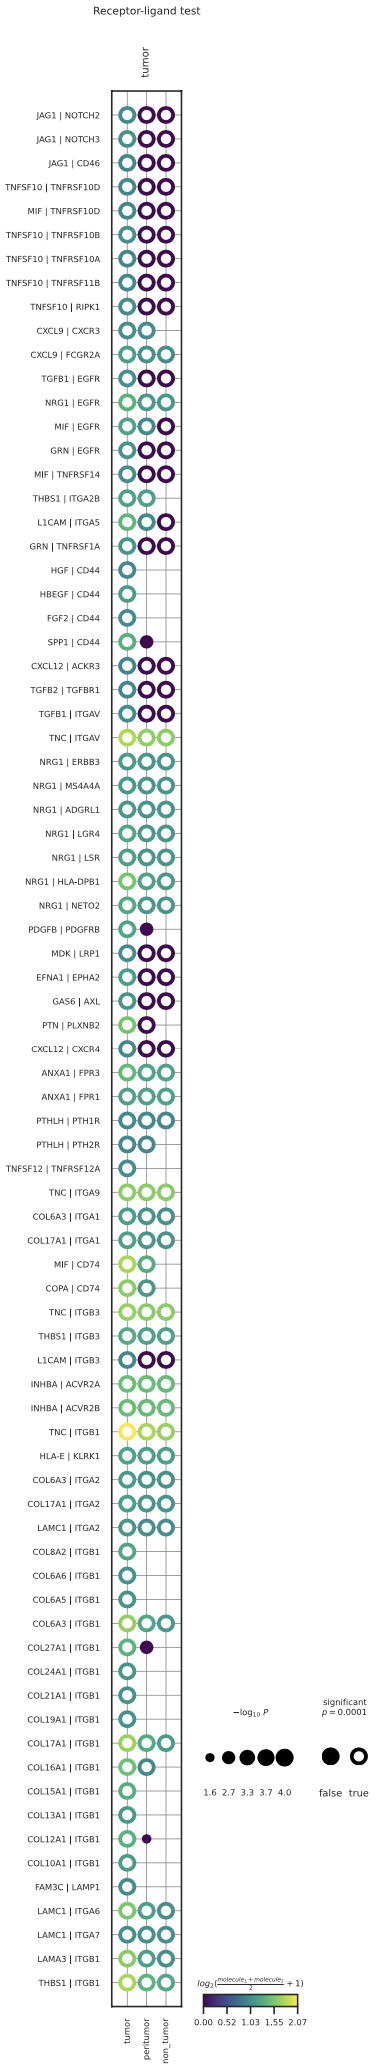

In [ ]:
res = sq.gr.ligrec(
    bdata,
    n_perms=1000,
    threshold=0.01,
    cluster_key=select_col,
    copy=True,
    use_raw=False,
    transmitter_params={"categories": "ligand"},
    receiver_params={"categories": "receptor"},
    interactions_params={'resources': 'CellPhoneDB'},
    corr_method="fdr_bh",
    corr_axis="clusters",
    alpha=0.05,
    seed=42,
    n_jobs=4
    )

res_means_T = res["means"].T
order_ =  ["tumor", "peritumor", "non_tumor"]
new_idx = pd.MultiIndex.from_product([order_ ,order_ ], 
                                     names=res_means_T.index.names
                                     )

res_df = pd.concat([res_means_T.reindex(new_idx).T,
                    res["pvalues"].T.reindex(new_idx).T.add_suffix("_pval")],
                   axis=1)

res["means"] = res_means_T.reindex(new_idx).T
res["pvalues"] = res["pvalues"].T.reindex(new_idx).T

Fetching interactions from `omnipath`
Fetched `1131` interactions
    Finish (0:00:00)
Running `1000` permutations on `506` interactions and `9` cluster combinations using `4` core(s)


  0%|          | 0/1000 [00:00<?, ?permutation/s]

Performing FDR correction across the `clusters` using method `fdr_bh` at level `0.05`
Finish (0:00:16)


In [ ]:
sq.pl.ligrec(res, 
             source_groups='tumor', 
             means_range=(0.95, np.inf), 
             pvalue_threshold=0.05,
             alpha=1e-4,
             show_colorbar=True,
             remove_nonsig_interactions=True,       
             )

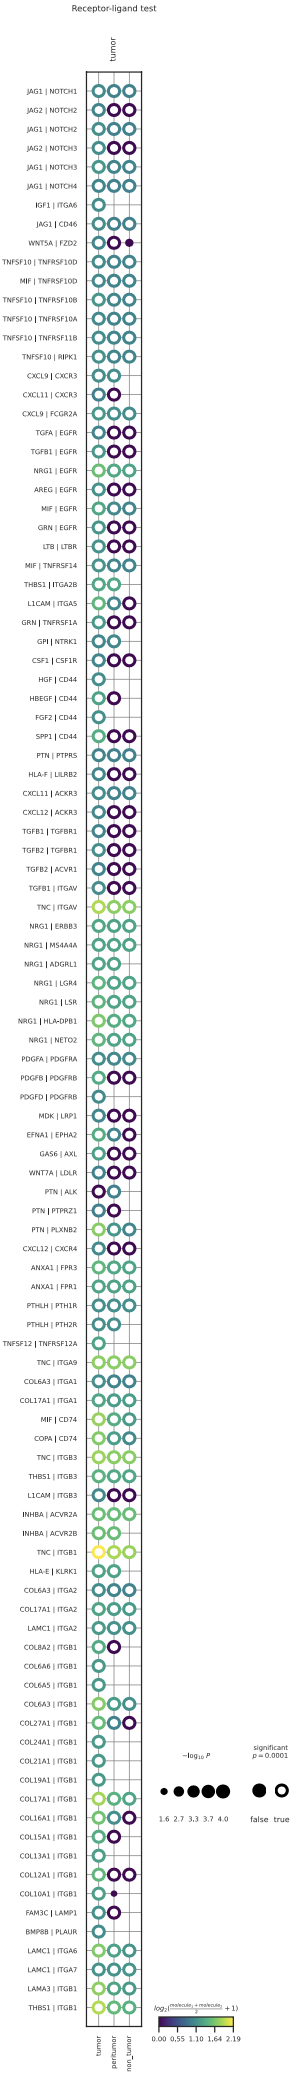

In [ ]:
res = sq.gr.ligrec(
    ddata,
    n_perms=1000,
    threshold=0.01,
    cluster_key=select_col,
    copy=True,
    use_raw=False,
    transmitter_params={"categories": "ligand"},
    receiver_params={"categories": "receptor"},
    interactions_params={'resources': 'CellPhoneDB'},
    corr_method="fdr_bh",
    corr_axis="clusters",
    alpha=0.05,
    seed=42,
    n_jobs=4
    )

res_means_T = res["means"].T
order_ =  ["tumor", "peritumor", "non_tumor"]
new_idx = pd.MultiIndex.from_product([order_ ,order_ ], 
                                     names=res_means_T.index.names
                                     )

res_df = pd.concat([res_means_T.reindex(new_idx).T,
                    res["pvalues"].T.reindex(new_idx).T.add_suffix("_pval")],
                   axis=1)

res["means"] = res_means_T.reindex(new_idx).T
res["pvalues"] = res["pvalues"].T.reindex(new_idx).T


Fetching interactions from `omnipath`
Fetched `1131` interactions
    Finish (0:00:00)
Running `1000` permutations on `509` interactions and `9` cluster combinations using `4` core(s)


  0%|          | 0/1000 [00:00<?, ?permutation/s]

Performing FDR correction across the `clusters` using method `fdr_bh` at level `0.05`
Finish (0:00:02)


In [ ]:
sq.pl.ligrec(res, 
             source_groups='tumor', 
             means_range=(0.95, np.inf), 
             pvalue_threshold=0.05,
             alpha=1e-4,
             show_colorbar=True,
             remove_nonsig_interactions=True,       
             )

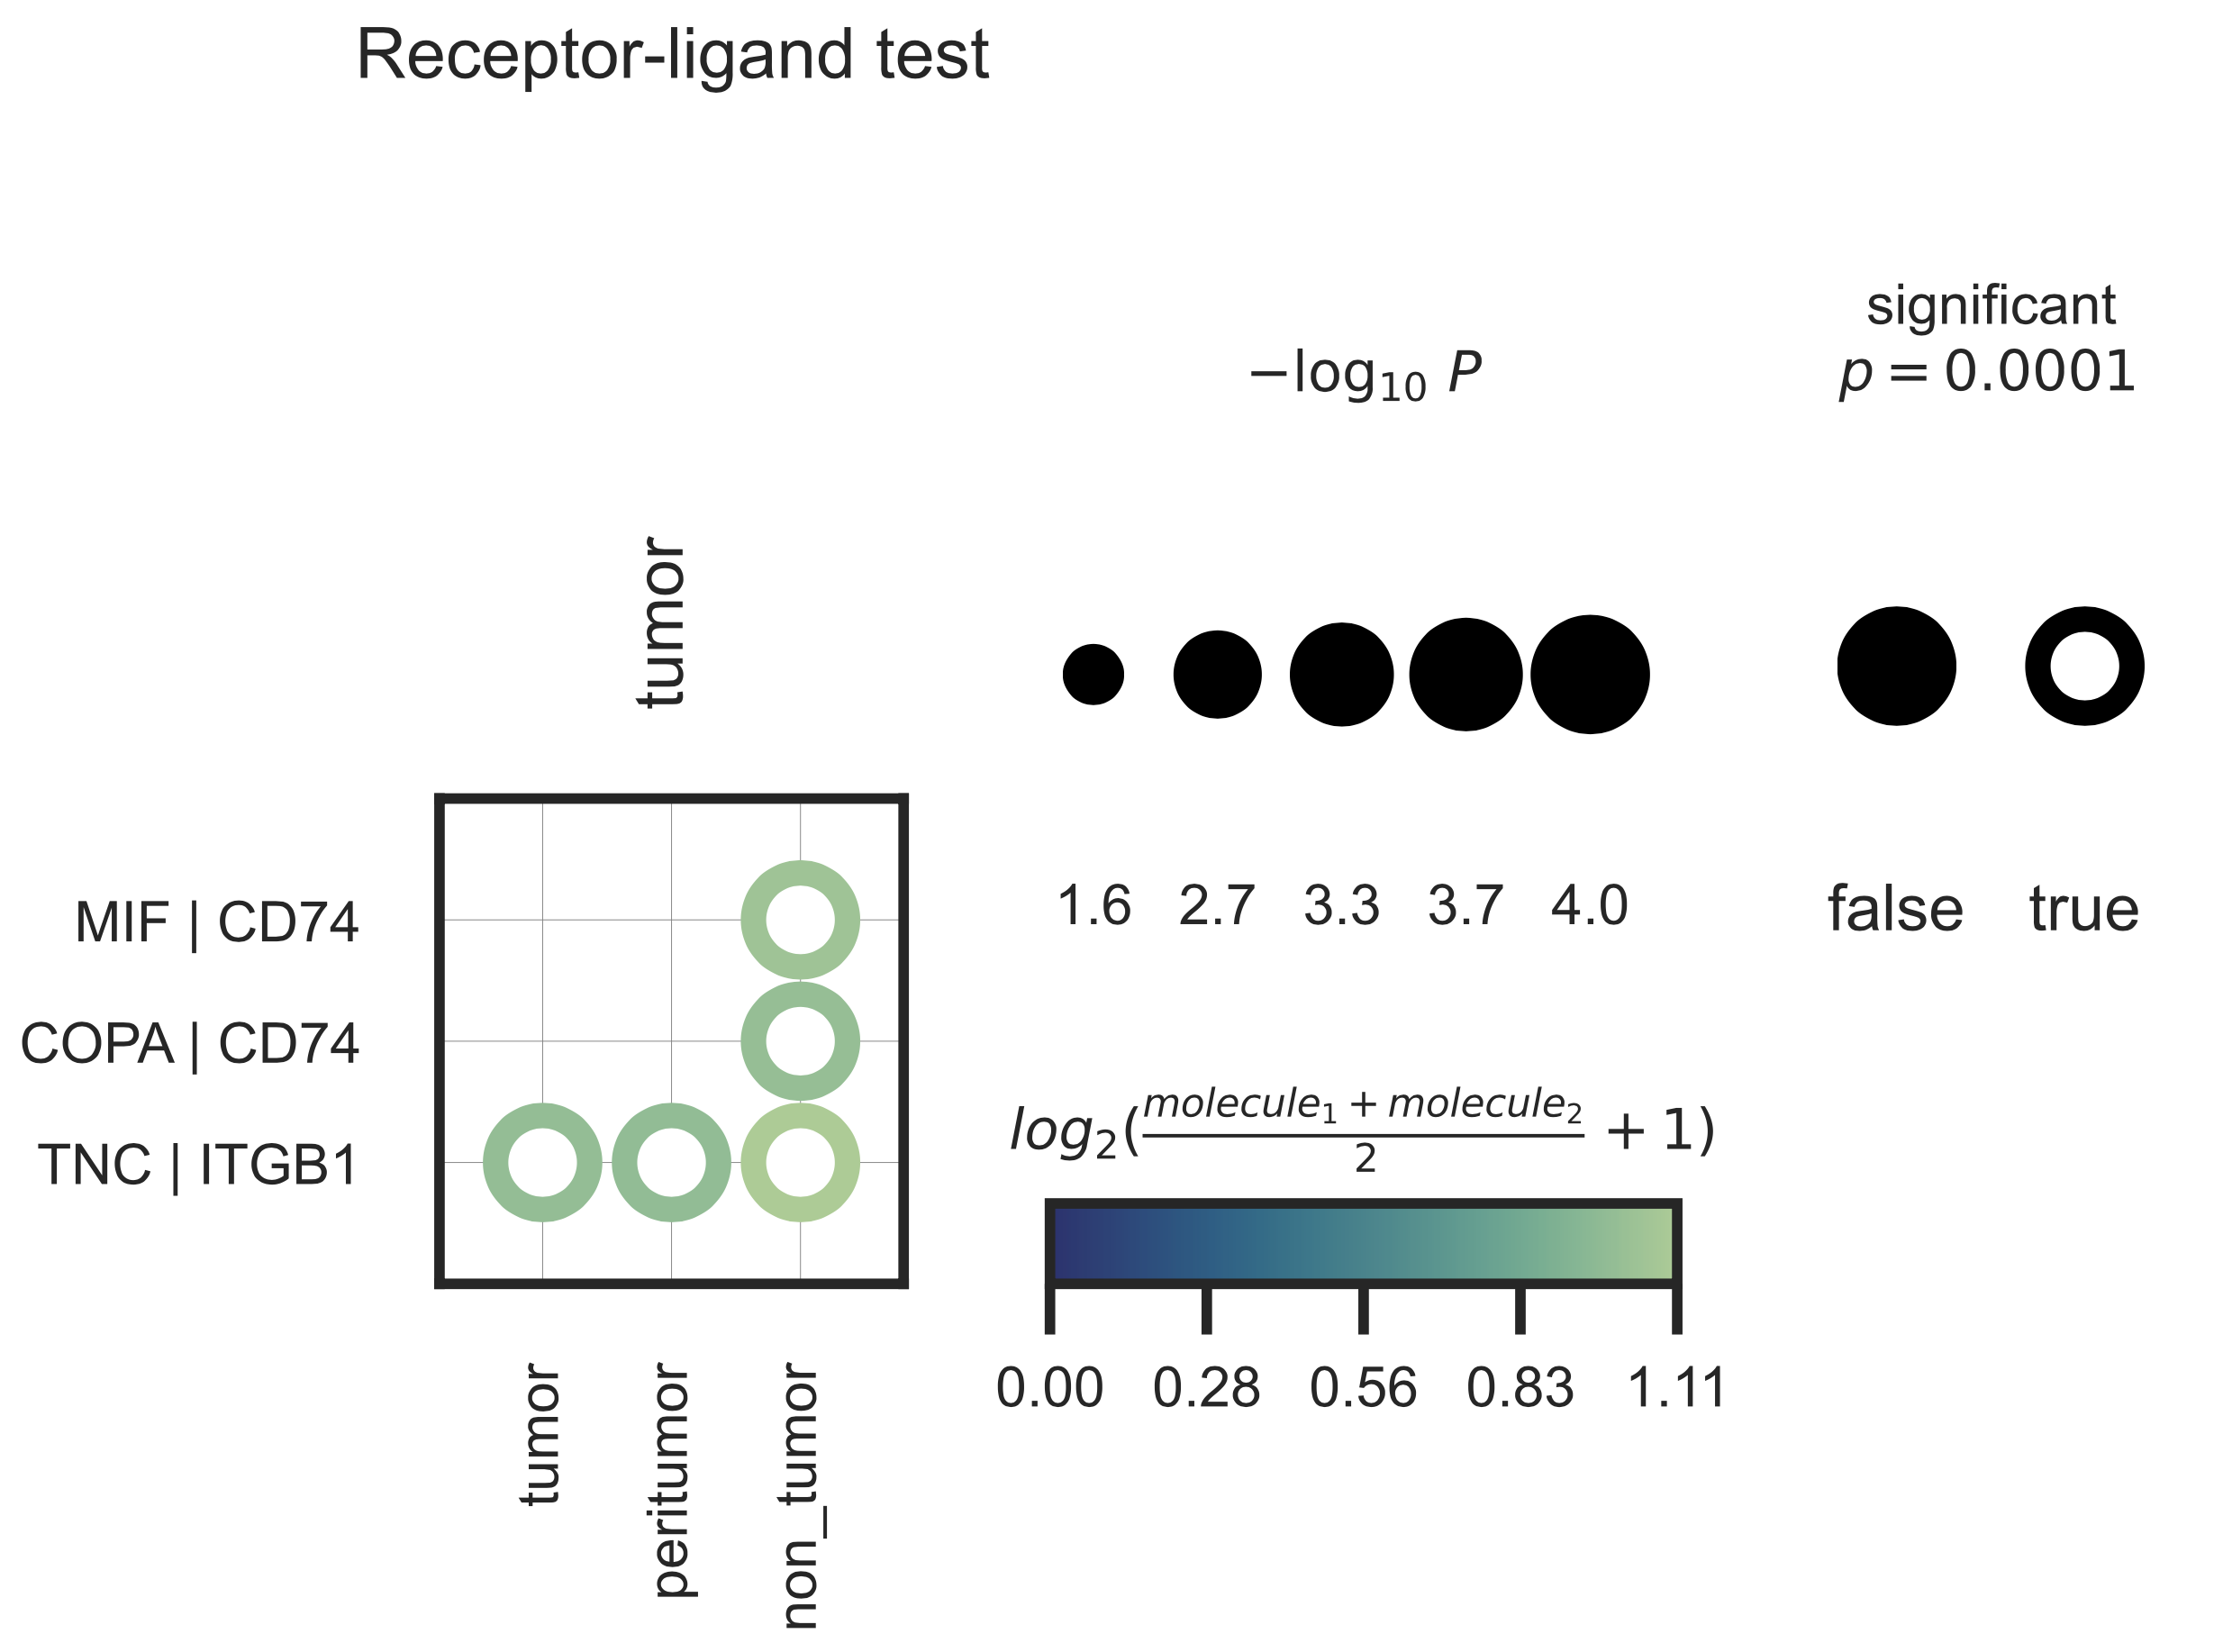